# Predicción de Ventas Futuras (Caso de Estudio)



Predecir las ventas futuras de un producto ayuda a una empresa a administrar el costo de fabricación y publicidad del producto. Hay muchos más beneficios de predecir las ventas futuras de un producto. Entonces, si desea aprender a predecir las ventas futuras de un producto con aprendizaje automático, este artículo es para usted.

### **1. Entendiendo los datos y el problema a resolver**

El set de datos que analizaremos contiene la información sobre las ventas del producto. El conjunto de datos es sobre el costo de publicidad incurrido por la empresa en diversas plataformas. A continuación vemos la descripción de cada una de las columnas:

+ TV: Costo de publicidad gastado en dólares por publicidad en TV;
+ Radio: Costo de publicidad gastado en dólares por publicidad en Radio;
+ Newspaper: Costo de publicidad gastado en dólares por publicidad en Periódico;
+ Sales: Cantidad de unidades vendidas

Ahora que conocemos los datos a analizar, sabiendo que las ventas del producto dependen del costo de publicidad gastado, veamos como realizar la predicción con Machine Learning usando Python.

### **2. Obteniendo los datos**

#### 2.0. Importamos las librerías básicas

In [4]:
import numpy as np
import pandas as pd

#### 2.1. Leemos los datos desde el archivo

In [5]:
datos = pd.read_csv('./datasets/advertising.csv')

#### 2.2. Vemos el tamaño del set de datos, los tipos de datos y una muestra de los mismos.

In [6]:
print(f'El set de datos tiene {datos.shape[0]} filas y {datos.shape[1]} columnas.')

El set de datos tiene 200 filas y 4 columnas.


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### **3. Realizamos el Análisis Exploratorio de los Datos (EDA)**

#### 3.0 Importamos las librerías para análisis gráfico

In [9]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns

#### 3.1. Vemos los nombres de las columnas/variables/features

In [10]:
datos.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

#### 3.2. Vemos los tipos de datos de cada columna

In [11]:
datos.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

#### 3.3. Verificamos si tenemos elementos nulos o faltantes

In [12]:
datos.isna().sum().sort_values(ascending=False)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### 3.4. Verificamos si tenemos registros duplicados

In [13]:
print(f'El set de datos tiene {datos.duplicated().sum()} registros duplicados')

El set de datos tiene 0 registros duplicados


#### 3.5. Realizamos un análisis descriptivo de las columnas

In [14]:
round(datos.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.042,85.854,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.264,14.847,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.554,21.779,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.131,5.284,1.6,11.000,16.00,19.050,27.0


#### 3.6. Identificamos la variable objetivo y la analizamos

La variable objetivo en este caso es *Sales*

In [15]:
px.histogram(datos,
             x='Sales',
             template='gridon',
             marginal='box'
             )

#### 3.7. Analizamos la variable objetivo en función de las otras variables

In [16]:
variables = ['TV', 'Radio', 'Newspaper']

for v in variables:
    fig = px.scatter(datos, 
                     y='Sales',
                     x=v,
                     size=v,
                     trendline='ols',
                     template='gridon',
                     marginal_x='box',
                     marginal_y='histogram'
                     )
    fig.show()

#### 3.8. Analizamos las correlaciones

In [17]:
metodos = ['pearson', 'spearman', 'kendall']

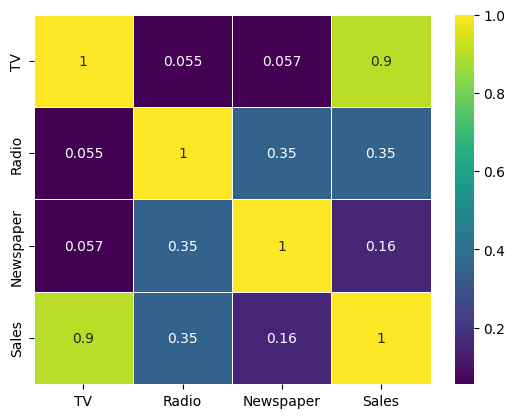

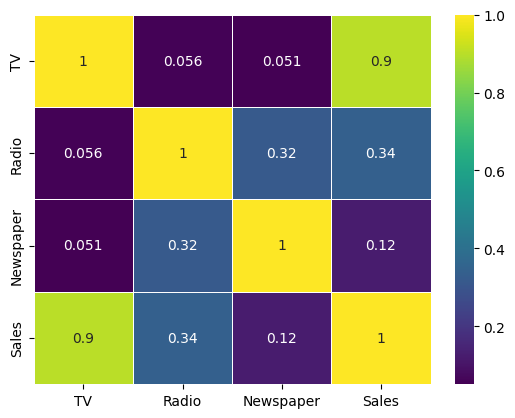

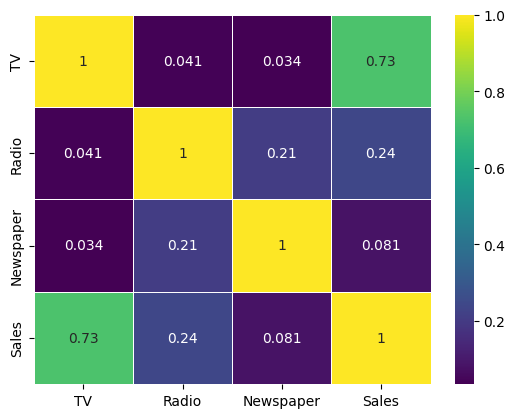

In [18]:
for m in metodos:
    m = round(datos.corr(m),3)
    plt.figure()
    sns.heatmap(m, annot=True, linewidths=0.5, cmap='viridis')


### **4. Preparamos los datos para el modelo**

#### 4.0 Importamos las librerias necesarias

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *


#### 4.1. Creamos una copia del set de datos, para no tocar los datos originales

In [20]:
df = datos.copy()
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


#### 4.2. Limpieza de Datos. 
De ser necesario eliminamos outliers, rellenamos valores nulos o eliminamos filas o columnas

In [21]:
df = df[(df.Newspaper <=89.4)] #Del gráfico de caja vemos que Newspaper tiene outliers por encima de 89.4
df.shape

(198, 4)

#### 4.3. Selección de variables
En este caso, y debido a lo acotado del set de datos, no procederemos a eliminar ninguna variables

#### 4.4. Ingeniería de Variables
En este caso no se realizará, pero se podrían realizar actividades como:
- Discretizar variables continuas
- Descomponer variables (ej.: categoricas, fecha/tiempo)
- Agregar transformaciones de variables (ej.: log(x), sqrt(x), x^2, etc)

#### 4.5. Escalado de variables
De ser necesario, se procedería a realizar normalización o estandarización. 

#### 4.6. Separamos variable objetivo de variables explicatorias

In [22]:
X = datos.drop('Sales', axis=1)
X.head(3)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [23]:
y = datos.Sales
y.head(3)

0    22.1
1    10.4
2    12.0
Name: Sales, dtype: float64

#### 4.7. Creamos los set de entrenamiento y de testeo

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, train_size=0.8)

### **5. Análisis de modelos**

#### 5.0. Importamos las librerias necesarias

In [25]:
#Librerias de modelos
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RANSACRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
#Librerias adicionales
from sklearn.metrics import mean_squared_error, r2_score

#### 5.1. Generamos el listado de modelos a evaluar

In [27]:
estimadores = {
    'LinearRegression' : LinearRegression(),
    'Lasso' : Lasso(alpha = 0.2),
    'Ridge' : Ridge(),
    'ElasticNet' : ElasticNet(alpha = 0.02),
    'SVR' : SVR(gamma = 'auto', C = 1.0, epsilon = 0.1),
    'RANSAC' : RANSACRegressor(), #Es un META estimador, se le pueden especificar diferentes estimadores en sus parametros, por defecto es lineal
    'HUBER' : HuberRegressor(epsilon=1.35),
    'GradientBoostingRegressor' : GradientBoostingRegressor()
}

#### 5.2. Entrenamos los modelos y analizamos las métricas

In [53]:
for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predicciones = estimador.predict(X_test)
    print('='*32)
    print(name)
    print('MSE = ', mean_squared_error(y_test, predicciones, squared = False))
    print('R2', r2_score(y_test, predicciones))

LinearRegression
MSE =  1.7395046663639002
R2 0.9086637457300812
Lasso
MSE =  1.7407183488765343
R2 0.9085362474958718
Ridge
MSE =  1.7395152323412173
R2 0.9086626361501641
ElasticNet
MSE =  1.7395778662194608
R2 0.9086560585517466
SVR
MSE =  5.893426143736586
R2 -0.04840163970294542
RANSAC
MSE =  1.6312793160984365
R2 0.9196753836443602
HUBER
MSE =  1.7083649328331396
R2 0.9119045867330946
GradientBoostingRegressor
MSE =  1.5056282105459668
R2 0.9315730019298257


De la comparación de los valores de MSE y R2, nos optamos por el modelo que mejor desempeño tuvo, en este caso ***Gradient Boosting Regressor***

#### 5.3. Generamos el mejor modelo 

In [49]:
mejor_modelo = GradientBoostingRegressor().fit(X_train.values, y_train)

In [50]:
mejor_modelo

GradientBoostingRegressor()

#### 5.4. Guardamos el modelo

In [51]:
import pickle

In [32]:
nombre_modelo = 'predictor_futuras_ventas.pkl'
with open(nombre_modelo, 'wb') as file:
    pickle.dump(mejor_modelo, file)

#### 5.5. Generamos una predicción

In [52]:
features = [['TV', 'Radio', 'Newspaper']]
features = np.array([[230.1, 37.8, 69.2]])
print(f'Las ventas proyectadas para una inversión de {features[0][0]} en TV, {features[0][1]} en Radio y {features[0][2]} en Newspaper es de {round(float(mejor_modelo.predict(features)),2)}')

Las ventas proyectadas para una inversión de 230.1 en TV, 37.8 en Radio y 69.2 en Newspaper es de 21.8


### **Conclusiones**

El modelo generado predice las ventas con **Error Medio** de ***1.50*** y con un valor de **$R^2$** de ***93.16%***.

Así es como podemos entrenar un modelo de aprendizaje automático para predecir las ventas futuras de un producto. Predecir las ventas futuras de un producto ayuda a una empresa a administrar el costo de fabricación y publicidad del producto.

Basado en el artículo de *Aman Kharwal* del sitio *https://thecleverprogrammer.com/*